In [ ]:
!nproc


8


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset.xlsx to final_dataset.xlsx


In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn interpret openpyxl jupyter ipykernel optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 73.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [ ]:
# LOADING DATA

data = pd.read_excel('final_dataset.xlsx')

data

,Unnamed: 0,STATE_CODE,SHRP_ID,YEAR,CONSTRUCTION_NO,MAX_MEAN_DEPTH_1_8,ANL_KESAL_LTPP_LN_YR,TOTAL_ANN_PRECIP,FREEZE_INDEX_YR,MAX_ANN_TEMP_AVG,MAX_ANN_TEMP_DAYS,DAYS_ABOVE_32_C_YR,MR_MATL_TYPE,RES_MOD_AVG,REPR_THICKNESS
0,0,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,21,NaN
1,1,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,19,NaN
2,2,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,77,NaN
3,3,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,79,NaN
4,4,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21751,21751,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,115,NaN
21752,21752,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,89,NaN
21753,21753,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,134,NaN
21754,21754,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,117,NaN


In [ ]:
# Data Preprocessing
# Drop any unnamed columns if they exist
unnamed_cols = [col for col in data.columns if 'Unnamed' in col]
if unnamed_cols:
    data.drop(unnamed_cols, inplace=True, axis=1)

# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
STATE_CODE                 0
SHRP_ID                    0
YEAR                       0
CONSTRUCTION_NO            0
MAX_MEAN_DEPTH_1_8         0
ANL_KESAL_LTPP_LN_YR       0
TOTAL_ANN_PRECIP           0
FREEZE_INDEX_YR            0
MAX_ANN_TEMP_AVG           0
MAX_ANN_TEMP_DAYS          0
DAYS_ABOVE_32_C_YR         0
MR_MATL_TYPE               0
RES_MOD_AVG                0
REPR_THICKNESS          5362
dtype: int64


In [ ]:
# Fill missing values with mean for REPR_THICKNESS if needed
if data['REPR_THICKNESS'].isnull().sum() > 0:
    data.fillna(data['REPR_THICKNESS'].mean(), inplace=True)

data

,STATE_CODE,SHRP_ID,YEAR,CONSTRUCTION_NO,MAX_MEAN_DEPTH_1_8,ANL_KESAL_LTPP_LN_YR,TOTAL_ANN_PRECIP,FREEZE_INDEX_YR,MAX_ANN_TEMP_AVG,MAX_ANN_TEMP_DAYS,DAYS_ABOVE_32_C_YR,MR_MATL_TYPE,RES_MOD_AVG,REPR_THICKNESS
0,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,21,97.883721
1,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,19,97.883721
2,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,77,97.883721
3,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,79,97.883721
4,37,1024,1992,1,9,80,1471.300049,11,19.799999,366,2,2,95,97.883721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21750,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,105,97.883721
21751,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,115,97.883721
21752,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,89,97.883721
21753,28,3082,1992,1,5,107,1240.800049,12,22.100000,366,17,2,134,97.883721


In [ ]:
# Feature Selection
# X: input variables
X = data.loc[:,[
    'CONSTRUCTION_NO',
    'ANL_KESAL_LTPP_LN_YR',
    'TOTAL_ANN_PRECIP',
    'FREEZE_INDEX_YR',
    'MAX_ANN_TEMP_AVG',
    'MAX_ANN_TEMP_DAYS',
    'DAYS_ABOVE_32_C_YR',
    'MR_MATL_TYPE',
    'RES_MOD_AVG',
    'REPR_THICKNESS'
]]

# y: output predictor
y = data.loc[:,['MAX_MEAN_DEPTH_1_8']]

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret.glassbox import ExplainableBoostingRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

print("Training Explainable Boosting Machine model...")
start_time = time.time()

# Define a reduced parameter grid to limit the number of total combinations.
param_grid = {
    'max_rounds': [1000, 5000],         # Fewer options than before
    'interactions': [10, 20],           # Reduced grid
    'max_bins': [256, 512],             # Two options
    'learning_rate': [0.005],           # Fixed learning rate to reduce complexity
    'min_samples_leaf': [2, 5]          # Two options
}

# Instantiate the EBM model with fixed parameters and a random state for reproducibility.
ebm = ExplainableBoostingRegressor(
    random_state=42,
    outer_bags=32,
    inner_bags=4,
    greedy_ratio=15.0,
    smoothing_rounds=1000,
    early_stopping_rounds=200,
    validation_size=0.2
)

# Setup HalvingGridSearchCV with 2-fold cross-validation to reduce runtime.
halving_search = HalvingGridSearchCV(
    estimator=ebm,
    param_grid=param_grid,
    cv=2,                           # 2-fold CV reduces number of fits
    factor=2,                       # Resource allocation factor
    scoring='neg_mean_squared_error',  # Use negative MSE to minimize error
    n_jobs=-1,
    verbose=2
)

# Fit grid search on the training data.
halving_search.fit(X_train, y_train.values.ravel())

print("Best hyperparameters found:")
print(halving_search.best_params_)

# Since scoring is negative MSE, convert to positive MSE.
best_mse = -halving_search.best_score_
print("Best CV MSE:", best_mse)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")


Training set shape: (4427, 10), (4427, 1)
Testing set shape: (1107, 10), (1107, 1)
Training Explainable Boosting Machine model...
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 276
max_resources_: 4427
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 16
n_resources: 276
Fitting 2 folds for each of 16 candidates, totalling 32 fits
----------
iter: 1
n_candidates: 8
n_resources: 552
Fitting 2 folds for each of 8 candidates, totalling 16 fits
----------
iter: 2
n_candidates: 4
n_resources: 1104
Fitting 2 folds for each of 4 candidates, totalling 8 fits
----------
iter: 3
n_candidates: 2
n_resources: 2208
Fitting 2 folds for each of 2 candidates, totalling 4 fits
----------
iter: 4
n_candidates: 1
n_resources: 4416
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best hyperparameters found:
{'interactions': 20, 'learning_rate': 0.005, 'max_bins': 512, 'max_rounds': 5000, 'min_samples_leaf': 2}
Best CV MSE: 0.9248324445202

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from interpret.glassbox import ExplainableBoostingRegressor
import numpy as np

# Define an expanded parameter distribution.
param_distributions = {
    'max_rounds': [1000, 3000, 5000, 7500, 10000],
    'interactions': [0, 5, 10, 15, 20],
    'max_bins': [64, 128, 256, 512],
    'learning_rate': [0.001, 0.005, 0.01],
    'min_samples_leaf': [2, 3, 5, 10]
}

print("Training Explainable Boosting Machine model...")
start_time = time.time()

# Instantiate the base EBM model with fixed parameters for those not in the search.
ebm = ExplainableBoostingRegressor(
    random_state=42,
    outer_bags=32,
    inner_bags=4,
    greedy_ratio=15.0,
    smoothing_rounds=1000,
    early_stopping_rounds=200,
    validation_size=0.2
)

# Setup RandomizedSearchCV to sample 20 combinations, using 2-fold CV.
random_search = RandomizedSearchCV(
    estimator=ebm,
    param_distributions=param_distributions,
    n_iter=20,
    cv=2,
    scoring='neg_mean_squared_error',  # We minimize MSE
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search on the training data.
random_search.fit(X_train, y_train.values.ravel())

print("Best hyperparameters found:")
print(random_search.best_params_)

# Convert negative MSE to positive value.
best_mse = -random_search.best_score_
print("Best CV MSE:", best_mse)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")


Training Explainable Boosting Machine model...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best hyperparameters found:
{'min_samples_leaf': 10, 'max_rounds': 7500, 'max_bins': 256, 'learning_rate': 0.005, 'interactions': 15}
Best CV MSE: 0.6417943489111535
Training completed in 31218.17 seconds


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a more extensive parameter grid.
param_grid_exhaustive = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate the base RF model.
rf_model_exhaustive = RandomForestRegressor(random_state=42)

# Setup GridSearchCV with 3-fold cross-validation.
grid_search_exhaustive = GridSearchCV(
    estimator=rf_model_exhaustive,
    param_grid=param_grid_exhaustive,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the training data.
grid_search_exhaustive.fit(X_train, y_train.values.ravel())

print("Best exhaustive grid search parameters:")
print(grid_search_exhaustive.best_params_)

# Convert negative MSE to positive value.
best_exhaustive_mse = -grid_search_exhaustive.best_score_
print("Best CV MSE (exhaustive):", best_exhaustive_mse)




Training set shape: (4427, 10), (4427, 1)
Testing set shape: (1107, 10), (1107, 1)
Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Best exhaustive grid search parameters:
{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 40}
Best CV MSE (exhaustive): 0.3894079092058151


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    # Suggest hyperparameter values within specified ranges.
    n_estimators = trial.suggest_int('n_estimators', 5, 50)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    max_features = trial.suggest_int('max_features', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)

    # Instantiate the RF model with suggested hyperparameters.
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Evaluate using 3-fold cross-validation with negative MSE.
    cv_scores = cross_val_score(model, X_train, y_train.values.ravel(),
                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

    # Return the average MSE (converted to positive).
    return -cv_scores.mean()

# Create a study object to minimize the objective function.
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Explore 50 trials

print("Best parameters from Optuna:")
print(study.best_params)
print("Best CV MSE from Optuna:", study.best_value)


[I 2025-03-18 18:59:58,994] A new study created in memory with name: no-name-dbfb7163-c352-4883-811d-4652c4e81dbe
[I 2025-03-18 18:59:59,152] Trial 0 finished with value: 0.39370367667886336 and parameters: {'n_estimators': 45, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.39370367667886336.
[I 2025-03-18 18:59:59,355] Trial 1 finished with value: 0.3900191106469315 and parameters: {'n_estimators': 49, 'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.3900191106469315.
[I 2025-03-18 18:59:59,421] Trial 2 finished with value: 0.6492570966079035 and parameters: {'n_estimators': 7, 'max_depth': 28, 'max_features': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.3900191106469315.
[I 2025-03-18 18:59:59,517] Trial 3 finished with value: 0.4197525538239222 and parameters: {'n_estimators': 21, 'max_depth': 16, 'max_features': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.3900191106469315.
[

Best parameters from Optuna:
{'n_estimators': 45, 'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 3}
Best CV MSE from Optuna: 0.3858595980364152


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Instantiate the RF model with the best parameters.
# Test R²: 0.9634634256100594
# Test MSE: 0.42818055791611254
best_rf = RandomForestRegressor(
    max_depth=25,
    max_features=6,
    min_samples_leaf=3,
    n_estimators=30,
    random_state=42
)


# Training R²: 0.9821585760057621
# Training MSE: 0.229963566446389
# Test R²: 0.9649318804900292
# Test MSE: 0.4109713958564847
best_rf = RandomForestRegressor(
    max_depth=30,
    max_features=5,
    min_samples_leaf=3,
    n_estimators=45,
    # random_state=42
)


# Fit the model on the training data.
best_rf.fit(X_train, y_train.values.ravel())

# Predict on the training set.
y_pred_train = best_rf.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)

# Predict on the test set.
y_pred_test = best_rf.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Training R²:", train_r2)
print("Training MSE:", train_mse)
print("Test R²:", test_r2)
print("Test MSE:", test_mse)


Training R²: 0.9821585760057621
Training MSE: 0.229963566446389
Test R²: 0.9649318804900292
Test MSE: 0.4109713958564847


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Create and train EBM model
# Documentation: https://interpret.ml/docs/ebm.html
# High-performance EBM configuration
print("Training Explainable Boosting Machine model...")
start_time = time.time()

ebm_model = ExplainableBoostingRegressor(
    # Much higher iteration count for more thorough learning
    max_rounds=5000,

    # More complex interaction modeling
    interactions=20,

    # Higher resolution binning for better capturing continuous relationships
    max_bins=512,

    # More bagging for better stability
    outer_bags=32,
    inner_bags=4,

    # Smaller learning rate for more refined convergence
    learning_rate=0.005,

    # Balance between greedy and cyclic boosting
    greedy_ratio=15.0,

    # More smoothing to capture complex relationships
    smoothing_rounds=1000,

    # Extended patience for optimal convergence
    early_stopping_rounds=200,

    # Smaller leaf samples for more detailed trees
    min_samples_leaf=2,

    # Extended validation splitting
    validation_size=0.2,

    # Random seed for reproducibility
    random_state=42
)

'''
max_rounds: 5000
interactions: 20
max_bins: 512
outer_bags: 32
inner_bags: 4
learning_rate: 0.005
early_stopping_rounds: 200
min_samples_leaf: 2
validation_size: 0.2
random_state: 42


'''

# Train the optimized model
ebm_model.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

Training set shape: (4427, 10), (4427, 1)
Testing set shape: (1107, 10), (1107, 1)
Training Explainable Boosting Machine model...
Training completed in 1832.44 seconds


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid you want to explore.
# param_grid = {
#     'max_rounds': [1000, 5000, 7500],
#     'interactions': [0, 10, 20],
#     'max_bins': [128, 256, 512],
#     'learning_rate': [0.005, 0.01],
#     'min_samples_leaf': [2, 5, 10]
# }

# # Instantiate the EBM model with fixed parameters and a random state for reproducibility.
# ebm = ExplainableBoostingRegressor(random_state=42, outer_bags=32, inner_bags=4,
#                                    greedy_ratio=15.0, smoothing_rounds=1000,
#                                    early_stopping_rounds=200, validation_size=0.2)

# # Setup grid search with a scoring metric (here using 'r2' for R² score).
# # You can use 'neg_mean_squared_error' if you prefer to minimize MSE.
# grid_search = GridSearchCV(ebm, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

# # Fit grid search on the training data.
# grid_search.fit(X_train, y_train.values.ravel())

# print("Best hyperparameters found:")
# print(grid_search.best_params_)
# print("Best CV R² score:")
# print(grid_search.best_score_)


In [ ]:
# Model Evaluation
# Predictions
y_pred_train = ebm_model.predict(X_train)
y_pred_test = ebm_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

# Cross Validation
# print("Cross Validation...")
# start_time = time.time()
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# cv_scores = cross_val_score(ebm_model, X_train, y_train.values.ravel(), cv=cv, n_jobs=-1, verbose=1)
# print(f"\nCross Validation R² (mean): {cv_scores.mean():.4f}")
# print(f"Cross Validation R² (std): {cv_scores.std():.4f}")
# cv_time = time.time() - start_time
# print(f"Cross Validation completed in {cv_time:.2f} seconds")


Model Performance:
Training R²: 0.9680
Testing R²: 0.9511
Training MSE: 0.4124
Testing MSE: 0.5729


In [ ]:
# Generate a global explanation
global_explanation = ebm_model.explain_global()

# Display the global explanation using the interpret dashboard
show(global_explanation)

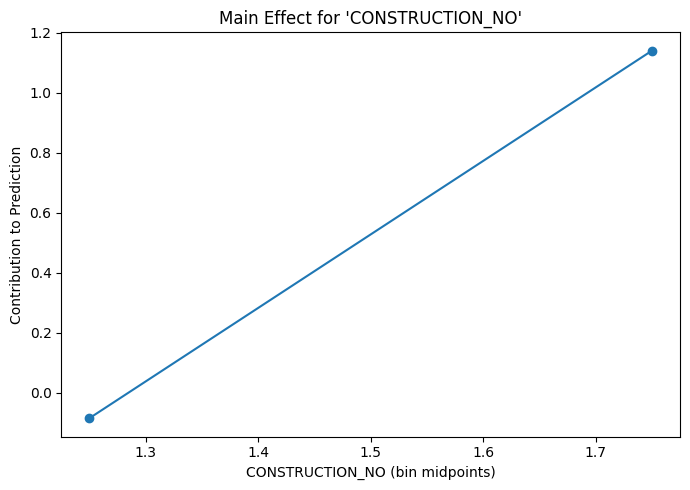

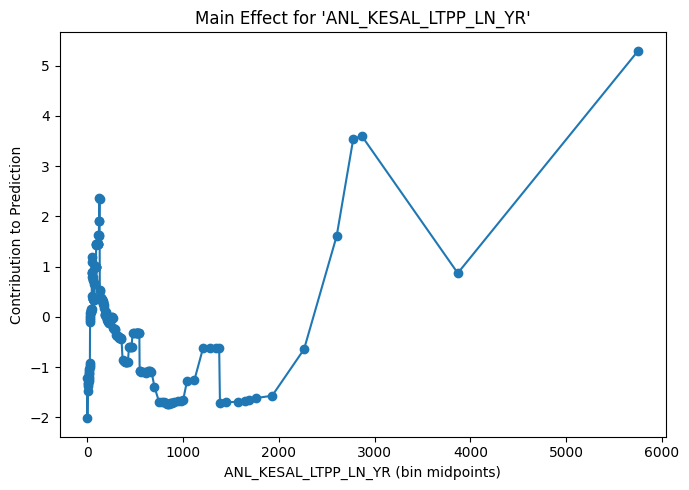

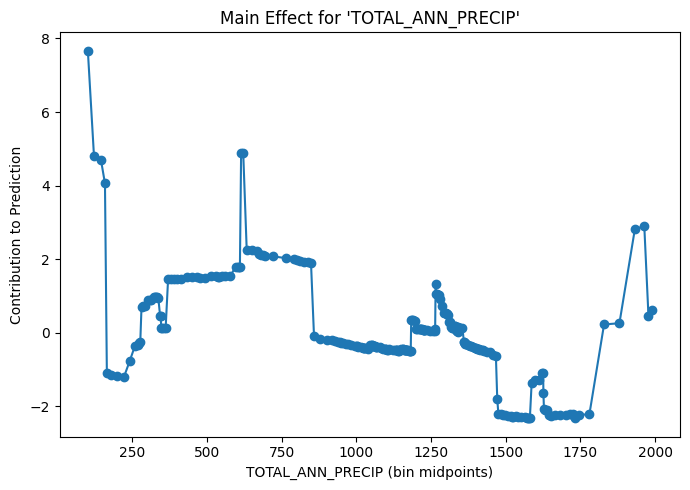

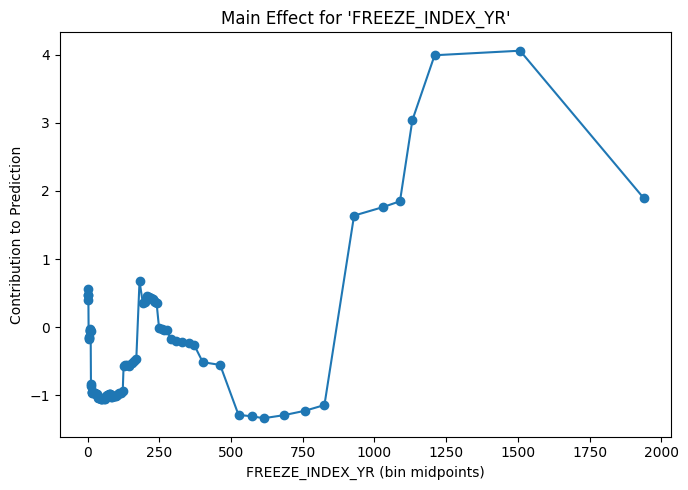

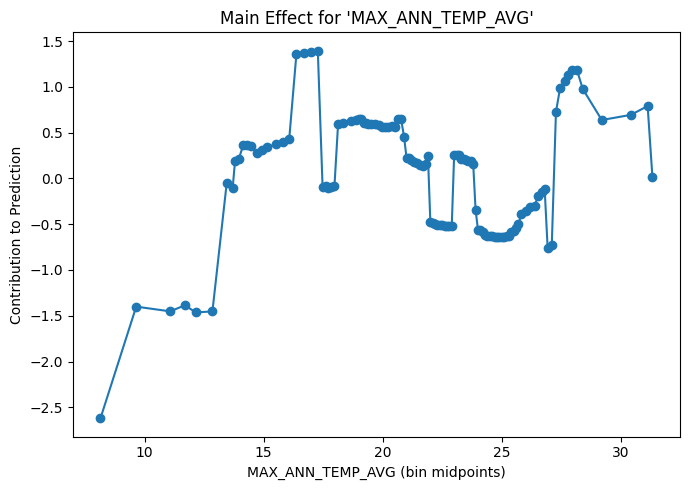

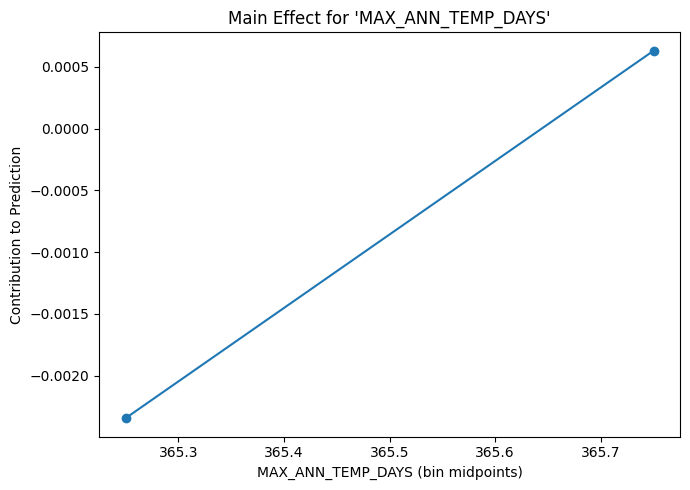

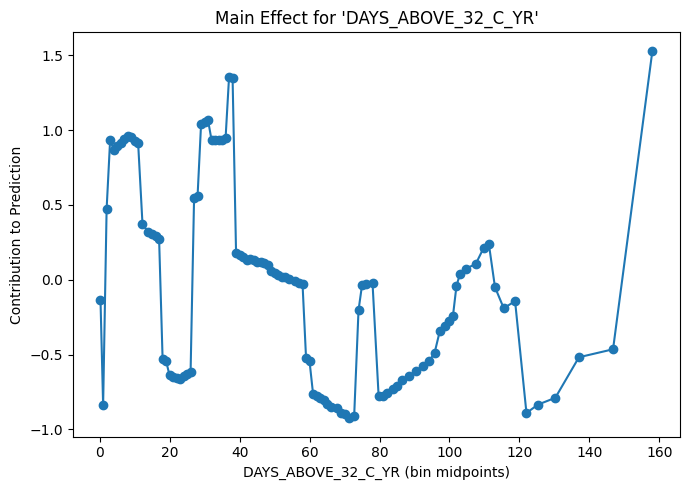

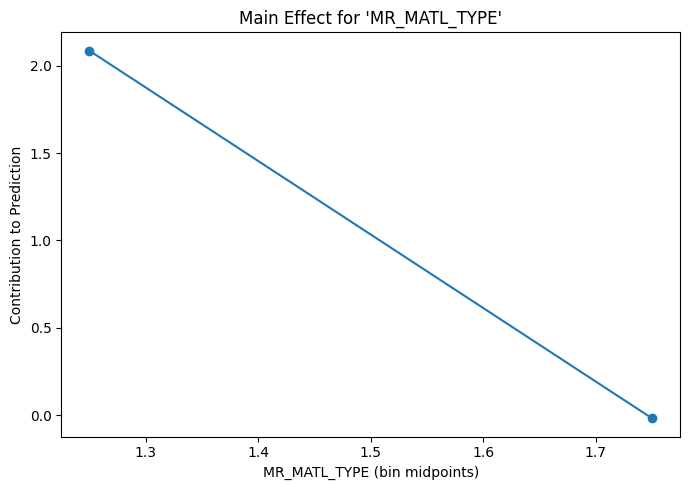

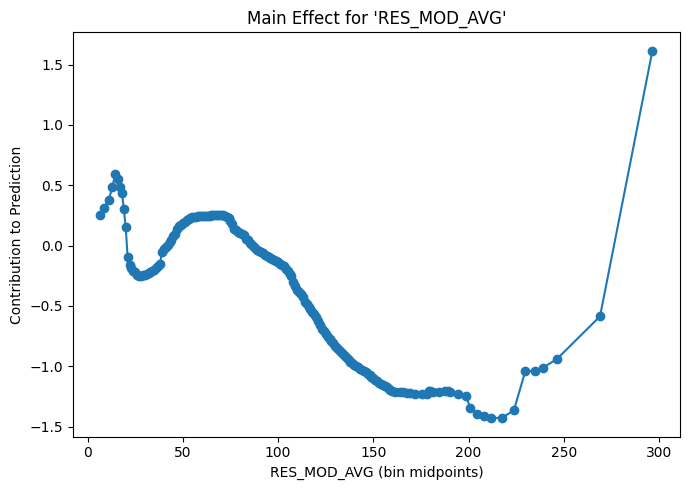

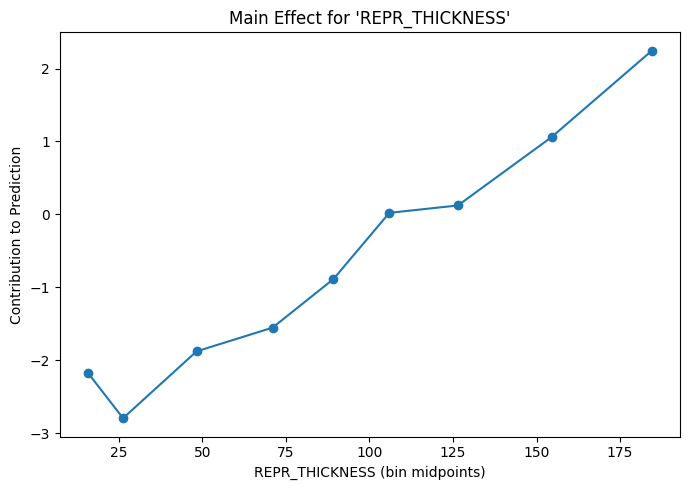

Skipping interaction 'CONSTRUCTION_NO & ANL_KESAL_LTPP_LN_YR' due to missing data.
Skipping interaction 'CONSTRUCTION_NO & FREEZE_INDEX_YR' due to missing data.
Skipping interaction 'CONSTRUCTION_NO & MAX_ANN_TEMP_AVG' due to missing data.
Skipping interaction 'CONSTRUCTION_NO & DAYS_ABOVE_32_C_YR' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & TOTAL_ANN_PRECIP' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & FREEZE_INDEX_YR' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & MAX_ANN_TEMP_AVG' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & MAX_ANN_TEMP_DAYS' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & DAYS_ABOVE_32_C_YR' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & MR_MATL_TYPE' due to missing data.
Skipping interaction 'ANL_KESAL_LTPP_LN_YR & RES_MOD_AVG' due to missing data.
Skipping interaction 'TOTAL_ANN_PRECIP & FREEZE_INDEX_YR' due to missing data.
Skipping interactio

In [ ]:
def get_bin_midpoints(bin_edges):
    """
    For numeric features with N bins (N+1 edges), return the midpoints.
    """
    midpoints = []
    for i in range(len(bin_edges) - 1):
        mid = 0.5 * (bin_edges[i] + bin_edges[i + 1])
        midpoints.append(mid)
    return midpoints

# Loop through all explanation entries
# Some will be univariate (main effects), others will be interaction (pairwise)
for i, feat_name in enumerate(global_explanation.feature_names):
    feat_data = global_explanation.data(i)

    # Check if it's a main effect or an interaction
    if feat_data["type"] == "univariate":
        # ~~~ MAIN EFFECT (1D) ~~~
        # Usually "names" are bin edges (for numeric) or category names (for categorical)
        # "scores" is the array of shape function values
        names = feat_data.get("names", None)
        scores = feat_data.get("scores", None)

        if names is None or scores is None:
            print(f"Skipping feature '{feat_name}' due to missing data.")
            continue

        plt.figure(figsize=(7, 5))

        if len(names) == len(scores) + 1:
            # Numeric feature with bin edges
            midpoints = get_bin_midpoints(names)
            plt.plot(midpoints, scores, marker='o')
            plt.xlabel(f"{feat_name} (bin midpoints)")
        elif len(names) == len(scores):
            # Possibly categorical feature or already matched numeric
            plt.plot(names, scores, marker='o')
            plt.xlabel(f"{feat_name} (categories or values)")
        else:
            # Fallback if lengths mismatch in some other way
            plt.plot(scores, marker='o')
            plt.xticks(range(len(scores)), labels=names, rotation=45)
            plt.xlabel(feat_name)

        plt.ylabel("Contribution to Prediction")
        plt.title(f"Main Effect for '{feat_name}'")
        plt.tight_layout()
        plt.show()

    elif feat_data["type"] == "interaction":
        # ~~~ INTERACTION (2D) ~~~
        # "scores" is typically a 2D matrix of shape function values
        # "bin_labels" or similar fields describe each dimension’s bins
        scores_2d = feat_data.get("scores", None)
        bin_labels = feat_data.get("bin_labels", None)  # Typically [labels_for_feature1, labels_for_feature2]

        if scores_2d is None or bin_labels is None:
            print(f"Skipping interaction '{feat_name}' due to missing data.")
            continue

        # Example: Plot a heatmap of the 2D interaction shape
        # If both features are numeric, these bin_labels may be edges and you might
        # want to convert them to midpoints in each dimension (similar to get_bin_midpoints).
        plt.figure(figsize=(8, 6))
        plt.imshow(scores_2d, cmap="RdBu_r", origin="lower", aspect="auto")
        plt.colorbar(label="Interaction Contribution")

        # Optionally set ticks:
        # If bin_labels[0] and bin_labels[1] are numeric edges, compute midpoints.
        # If they’re categories, you can set them directly.

        # For demonstration, we’ll just label with the raw bin_labels if they match the shape:
        x_labels = bin_labels[1]
        y_labels = bin_labels[0]

        # If each dimension has edges with length = number_of_bins + 1, we can do midpoints:
        # x_mid = get_bin_midpoints(x_labels) if len(x_labels) == scores_2d.shape[1] + 1 else x_labels
        # y_mid = get_bin_midpoints(y_labels) if len(y_labels) == scores_2d.shape[0] + 1 else y_labels
        #
        # Then we’d do something like:
        # plt.xticks(range(scores_2d.shape[1]), [round(x,2) for x in x_mid], rotation=45)
        # plt.yticks(range(scores_2d.shape[0]), [round(y,2) for y in y_mid])

        plt.title(f"Interaction: {feat_name}")
        plt.xlabel("Bins of second feature")
        plt.ylabel("Bins of first feature")
        plt.tight_layout()
        plt.show()

    else:
        print(f"Skipping index {i} with unknown type: {feat_data.get('type')}")

In [ ]:
# For local explanations, get explanations for the first 5 test samples:
local_explanation = ebm_model.explain_local(X_test[:5], y_test[:5])
show(local_explanation)

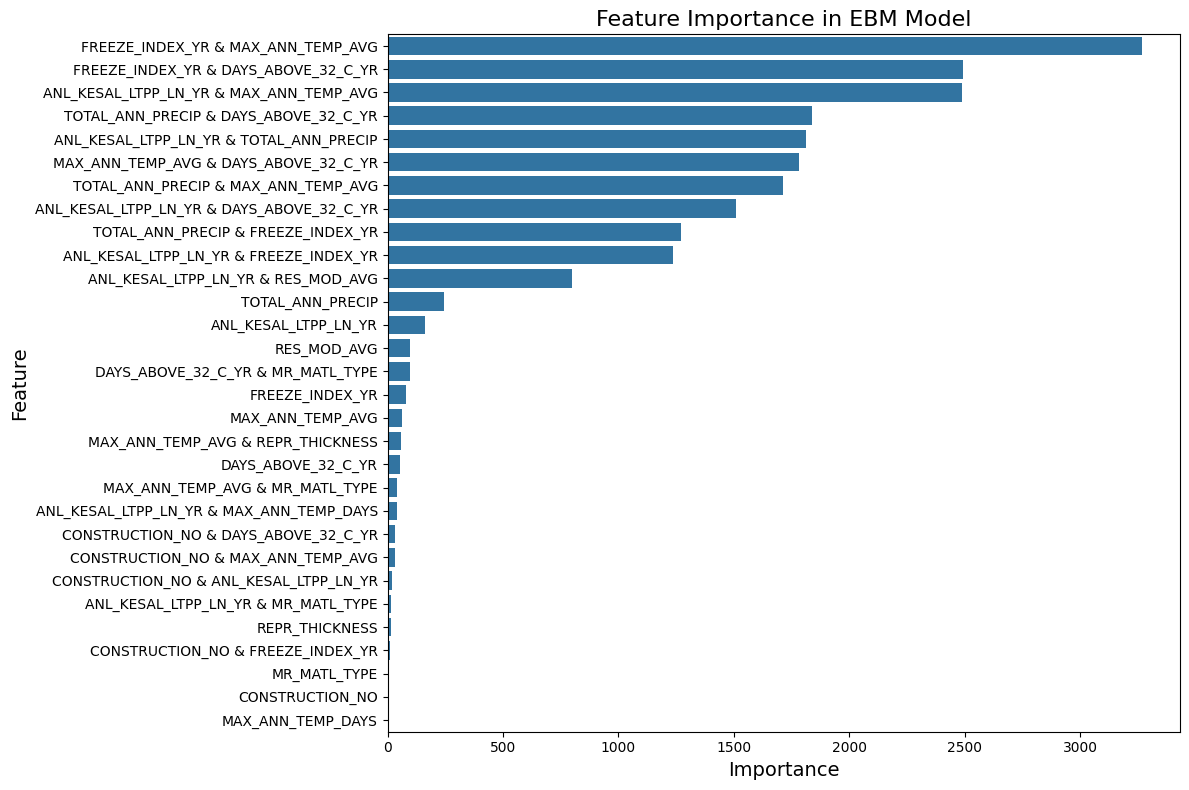

In [ ]:
# Correct approach that works with EBM's structure
plt.figure(figsize=(12, 8))

# Get the global explanation
global_explanation = ebm_model.explain_global()

# Extract feature names and their importance directly from the explanation object
feature_names = global_explanation.feature_names
# Get importance for main effects only (no interactions)
importances = np.array([abs(global_explanation.data(i)['scores']).sum()
                        for i in range(len(feature_names))])

# Create DataFrame for easier plotting
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create the plot
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in EBM Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('ebm_feature_importance.png', dpi=300)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

###############################################################################
# 1. Custom Transformer for Domain-Specific Features
###############################################################################
class DomainTransformer(BaseEstimator, TransformerMixin):
    """
    Example domain-specific feature engineering:
    - Creates a ratio of 'MAX_ANN_TEMP_DAYS' to 'MAX_ANN_TEMP_AVG'
    - Creates an interaction between 'TOTAL_ANN_PRECIP' and 'ANL_KESAL_LTPP_LN_YR'
    - You can add more domain-based transformations here.
    """

    def __init__(self, add_temp_ratio=True, add_precip_kesal_interaction=True):
        self.add_temp_ratio = add_temp_ratio
        self.add_precip_kesal_interaction = add_precip_kesal_interaction
        self.feature_names_out_ = None  # We'll store the updated feature names after transform

    def fit(self, X, y=None):
        # No fitting needed for purely deterministic transformations
        return self

    def transform(self, X, y=None):
        # Work on a copy to avoid SettingWithCopyWarnings
        X_ = X.copy()

        # Create a new column for the ratio of MAX_ANN_TEMP_DAYS to MAX_ANN_TEMP_AVG
        if self.add_temp_ratio:
            X_['TEMP_RATIO'] = X_['MAX_ANN_TEMP_DAYS'] / (X_['MAX_ANN_TEMP_AVG'] + 1e-6)

        # Create an interaction column for precipitation * KESAL
        if self.add_precip_kesal_interaction:
            X_['PRECIP_KESAL'] = X_['TOTAL_ANN_PRECIP'] * X_['ANL_KESAL_LTPP_LN_YR']

        # Optionally, update feature names if you want to keep track
        self.feature_names_out_ = list(X_.columns)

        return X_

    def get_feature_names_out(self, input_features=None):
        """
        Optional method to align with scikit-learn's newer pipeline introspection.
        Returns the updated feature names after transformations.
        """
        return self.feature_names_out_ if self.feature_names_out_ else input_features

###############################################################################
# 2. Data Loading & Basic Preprocessing
###############################################################################

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###############################################################################
# 3. Build a Pipeline for Domain + Polynomial + Scaling + RF
###############################################################################
pipeline = Pipeline([
    ('domain', DomainTransformer()),         # Our custom domain-specific transformations
    ('poly', PolynomialFeatures()),          # Optional polynomial expansions
    ('scaler', StandardScaler()),            # Optional scaling
    ('rf', RandomForestRegressor(random_state=42))
])

###############################################################################
# 4. Define Parameter Grid (Feature Engineering + Model Hyperparams)
###############################################################################
param_grid = {
    # DomainTransformer toggles
    'domain__add_temp_ratio': [True, False],
    'domain__add_precip_kesal_interaction': [True, False],

    # Polynomial features toggles
    'poly': [
        PolynomialFeatures(degree=1, include_bias=False),  # effectively no polynomial expansion
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
        # You could add degree=2, interaction_only=True, etc.
    ],

    # Scaler toggles
    'scaler': [StandardScaler(), 'passthrough'],

    # RandomForest hyperparams
    'rf__n_estimators': [10, 20],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_leaf': [1, 2, 3],
}

###############################################################################
# 5. Grid Search to Minimize MSE
###############################################################################
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=3,         # 3-fold cross-validation
    n_jobs=-1,    # parallelize
    verbose=2
)

grid_search.fit(X_train, y_train)

###############################################################################
# 6. Evaluate Best Model
###############################################################################
print("Best parameters found:", grid_search.best_params_)
print("Best CV MSE (negative):", grid_search.best_score_)
best_mse = -grid_search.best_score_
print("Best CV MSE:", best_mse)

best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", test_mse)

###############################################################################
# 7. (Optional) Check R² as well
###############################################################################
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_pred_test)
print("Test R²:", test_r2)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found: {'domain__add_precip_kesal_interaction': True, 'domain__add_temp_ratio': True, 'poly': PolynomialFeatures(include_bias=False), 'rf__max_depth': 15, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 20, 'scaler': StandardScaler()}
Best CV MSE (negative): -0.4025816574048817
Best CV MSE: 0.4025816574048817
Test MSE: 0.4294238708456587
Test R²: 0.9633573339286401


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

###############################################################################
# Custom Transformers
###############################################################################
class DomainTransformer(BaseEstimator, TransformerMixin):
    """
    Adds domain-specific features:
    - TEMP_RATIO: Ratio of MAX_ANN_TEMP_DAYS to MAX_ANN_TEMP_AVG.
    - PRECIP_KESAL: Interaction between TOTAL_ANN_PRECIP and ANL_KESAL_LTPP_LN_YR.
    """
    def __init__(self, add_temp_ratio=True, add_precip_kesal_interaction=True):
        self.add_temp_ratio = add_temp_ratio
        self.add_precip_kesal_interaction = add_precip_kesal_interaction

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        if self.add_temp_ratio:
            X_['TEMP_RATIO'] = X_['MAX_ANN_TEMP_DAYS'] / (X_['MAX_ANN_TEMP_AVG'] + 1e-6)
        if self.add_precip_kesal_interaction:
            X_['PRECIP_KESAL'] = X_['TOTAL_ANN_PRECIP'] * X_['ANL_KESAL_LTPP_LN_YR']
        return X_

class LogTransformer(BaseEstimator, TransformerMixin):
    """
    Applies a log1p transformation to all features.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.log1p(X)

###############################################################################
# Data Loading & Preprocessing
###############################################################################

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###############################################################################
# Pipeline: Domain Transformer, Optional Log Transformation, Polynomial Features, Scaler, RF
###############################################################################
pipeline = Pipeline([
    ('domain', DomainTransformer()),
    ('log', LogTransformer()),       # Optionally apply log transformation
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('scaler', StandardScaler()),    # Standard scaling
    ('rf', RandomForestRegressor(random_state=42))
])

###############################################################################
# Define an Exhaustive Parameter Grid
###############################################################################
param_grid = {
    # DomainTransformer toggles
    'domain__add_temp_ratio': [True, False],
    'domain__add_precip_kesal_interaction': [True, False],

    # Log Transformation: either apply LogTransformer or passthrough
    'log': [LogTransformer(), 'passthrough'],

    # Polynomial Features: try different degrees and interaction options.
    'poly': [
        PolynomialFeatures(degree=1, include_bias=False),  # no expansion
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
        PolynomialFeatures(degree=3, include_bias=False, interaction_only=False),
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    ],

    # Scaling: standard scaling vs. no scaling
    'scaler': [StandardScaler(), 'passthrough'],

    # RandomForest Hyperparameters
    'rf__n_estimators': [10, 15, 20, 25, 30],
    'rf__max_depth': [5, 10, 15, 20, 25, 30],
    'rf__max_features': [2, 4, 6, 8, 10],
    'rf__min_samples_leaf': [1, 2, 3, 4, 5]
}

###############################################################################
# Grid Search to Optimize (Minimize) MSE
###############################################################################
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best CV MSE (negative):", grid_search.best_score_)
best_mse = -grid_search.best_score_
print("Best CV MSE:", best_mse)

###############################################################################
# Evaluate the Best Model on the Test Set
###############################################################################
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Fitting 3 folds for each of 48000 candidates, totalling 144000 fits
Best parameters found: {'domain__add_precip_kesal_interaction': False, 'domain__add_temp_ratio': True, 'log': LogTransformer(), 'poly': PolynomialFeatures(include_bias=False), 'rf__max_depth': 20, 'rf__max_features': 10, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 20, 'scaler': StandardScaler()}
Best CV MSE (negative): -0.37777192227158096
Best CV MSE: 0.37777192227158096
Test MSE: 0.4237613520831523
Test R²: 0.9638405156943132


In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Extended domain transformer that creates additional features.
class ExtendedDomainTransformer(BaseEstimator, TransformerMixin):
    """
    Creates additional domain-specific features:
    - TEMP_RATIO: Ratio of MAX_ANN_TEMP_DAYS to MAX_ANN_TEMP_AVG.
    - PRECIP_KESAL: Interaction between TOTAL_ANN_PRECIP and ANL_KESAL_LTPP_LN_YR.
    - RES_MOD_RATIO: Ratio of RES_MOD_AVG to REPR_THICKNESS.
    - TEMP_PRECIP_PRODUCT: Product of MAX_ANN_TEMP_AVG and TOTAL_ANN_PRECIP.
    """
    def __init__(self, add_temp_ratio=True, add_precip_kesal_interaction=True,
                 add_res_mod_ratio=True, add_temp_precip_product=True):
        self.add_temp_ratio = add_temp_ratio
        self.add_precip_kesal_interaction = add_precip_kesal_interaction
        self.add_res_mod_ratio = add_res_mod_ratio
        self.add_temp_precip_product = add_temp_precip_product

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        if self.add_temp_ratio:
            X_['TEMP_RATIO'] = X_['MAX_ANN_TEMP_DAYS'] / (X_['MAX_ANN_TEMP_AVG'] + 1e-6)
        if self.add_precip_kesal_interaction:
            X_['PRECIP_KESAL'] = X_['TOTAL_ANN_PRECIP'] * X_['ANL_KESAL_LTPP_LN_YR']
        if self.add_res_mod_ratio:
            X_['RES_MOD_RATIO'] = X_['RES_MOD_AVG'] / (X_['REPR_THICKNESS'] + 1e-6)
        if self.add_temp_precip_product:
            X_['TEMP_PRECIP_PRODUCT'] = X_['MAX_ANN_TEMP_AVG'] * X_['TOTAL_ANN_PRECIP']
        return X_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with extended domain features, optional log transformation, polynomial features, scaling, and RF.
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=False)  # log1p transformation

pipeline = Pipeline([
    ('domain', ExtendedDomainTransformer()),
    ('log', log_transformer),  # You can try 'passthrough' instead if needed
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define an expanded parameter grid
param_grid = {
    'domain__add_temp_ratio': [True, False],
    'domain__add_precip_kesal_interaction': [True, False],
    'domain__add_res_mod_ratio': [True, False],
    'domain__add_temp_precip_product': [True, False],
    'log': [log_transformer, 'passthrough'],
    'poly': [
        PolynomialFeatures(degree=1, include_bias=False),
        PolynomialFeatures(degree=2, include_bias=False),
        PolynomialFeatures(degree=3, include_bias=False)
    ],
    'scaler': [StandardScaler(), 'passthrough'],
    'rf__n_estimators': [10, 15, 20, 25, 30],
    'rf__max_depth': [5, 10, 15, 20, 25, 30],
    'rf__max_features': [2, 4, 6, 8, 10],
    'rf__min_samples_leaf': [1, 2, 3, 4, 5]
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
best_mse = -grid_search.best_score_
print("Best CV MSE:", best_mse)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Fitting 3 folds for each of 144000 candidates, totalling 432000 fits
Best parameters found: {'domain__add_precip_kesal_interaction': False, 'domain__add_res_mod_ratio': False, 'domain__add_temp_precip_product': True, 'domain__add_temp_ratio': False, 'log': FunctionTransformer(func=<ufunc 'log1p'>), 'poly': PolynomialFeatures(include_bias=False), 'rf__max_depth': 25, 'rf__max_features': 8, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 30, 'scaler': StandardScaler()}
Best CV MSE: 0.3736606738823129
Test MSE: 0.4228787414975573
Test R²: 0.9639158287058961


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# Extended domain transformer that creates additional features.
class ExtendedDomainTransformer(BaseEstimator, TransformerMixin):
    """
    Creates additional domain-specific features:
    - TEMP_RATIO: Ratio of MAX_ANN_TEMP_DAYS to MAX_ANN_TEMP_AVG.
    - PRECIP_KESAL: Interaction between TOTAL_ANN_PRECIP and ANL_KESAL_LTPP_LN_YR.
    - RES_MOD_RATIO: Ratio of RES_MOD_AVG to REPR_THICKNESS.
    - TEMP_PRECIP_PRODUCT: Product of MAX_ANN_TEMP_AVG and TOTAL_ANN_PRECIP.
    """
    def __init__(self, add_temp_ratio=True, add_precip_kesal_interaction=True,
                 add_res_mod_ratio=True, add_temp_precip_product=True):
        self.add_temp_ratio = add_temp_ratio
        self.add_precip_kesal_interaction = add_precip_kesal_interaction
        self.add_res_mod_ratio = add_res_mod_ratio
        self.add_temp_precip_product = add_temp_precip_product

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        if self.add_temp_ratio:
            X_['TEMP_RATIO'] = X_['MAX_ANN_TEMP_DAYS'] / (X_['MAX_ANN_TEMP_AVG'] + 1e-6)
        if self.add_precip_kesal_interaction:
            X_['PRECIP_KESAL'] = X_['TOTAL_ANN_PRECIP'] * X_['ANL_KESAL_LTPP_LN_YR']
        if self.add_res_mod_ratio:
            X_['RES_MOD_RATIO'] = X_['RES_MOD_AVG'] / (X_['REPR_THICKNESS'] + 1e-6)
        if self.add_temp_precip_product:
            X_['TEMP_PRECIP_PRODUCT'] = X_['MAX_ANN_TEMP_AVG'] * X_['TOTAL_ANN_PRECIP']
        return X_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Domain transformer parameters
    add_temp_ratio = trial.suggest_categorical('add_temp_ratio', [True, False])
    add_precip_kesal = trial.suggest_categorical('add_precip_kesal', [True, False])
    add_res_mod_ratio = trial.suggest_categorical('add_res_mod_ratio', [True, False])
    add_temp_precip_product = trial.suggest_categorical('add_temp_precip_product', [True, False])

    # Log transformation toggle
    use_log = trial.suggest_categorical('use_log', [True, False])

    # Polynomial features degree (1 = no expansion)
    poly_degree = trial.suggest_int('poly_degree', 1, 3)

    # Scaler toggle
    use_scaler = trial.suggest_categorical('use_scaler', [True, False])

    # RF hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 50)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    max_features = trial.suggest_int('max_features', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)

    # Build the pipeline with the suggested parameters.
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
    from sklearn.ensemble import RandomForestRegressor

    domain = ExtendedDomainTransformer(
        add_temp_ratio=add_temp_ratio,
        add_precip_kesal_interaction=add_precip_kesal,
        add_res_mod_ratio=add_res_mod_ratio,
        add_temp_precip_product=add_temp_precip_product
    )

    if use_log:
        from sklearn.preprocessing import FunctionTransformer
        log_trans = FunctionTransformer(np.log1p, validate=False)
    else:
        log_trans = 'passthrough'

    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    scaler = StandardScaler() if use_scaler else 'passthrough'

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    pipeline = Pipeline([
        ('domain', domain),
        ('log', log_trans),
        ('poly', poly),
        ('scaler', scaler),
        ('rf', rf)
    ])

    # Evaluate with 3-fold cross-validation on training data.
    cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(),
                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    return -np.mean(cv_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters from Optuna:")
print(study.best_params)
print("Best CV MSE from Optuna:", study.best_value)


[I 2025-03-19 03:53:17,214] A new study created in memory with name: no-name-6cebf09a-e3b1-4705-8890-aa9665ebed57
[I 2025-03-19 03:53:18,979] Trial 0 finished with value: 0.6312038386227375 and parameters: {'add_temp_ratio': True, 'add_precip_kesal': True, 'add_res_mod_ratio': True, 'add_temp_precip_product': True, 'use_log': False, 'poly_degree': 3, 'use_scaler': True, 'n_estimators': 11, 'max_depth': 16, 'max_features': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6312038386227375.
[I 2025-03-19 03:53:20,586] Trial 1 finished with value: 0.5141682365907444 and parameters: {'add_temp_ratio': False, 'add_precip_kesal': False, 'add_res_mod_ratio': True, 'add_temp_precip_product': True, 'use_log': True, 'poly_degree': 3, 'use_scaler': True, 'n_estimators': 45, 'max_depth': 24, 'max_features': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.5141682365907444.
[I 2025-03-19 03:53:21,804] Trial 2 finished with value: 0.7538209375780526 and parameters: {'add_temp_ratio': 

Best parameters from Optuna:
{'add_temp_ratio': True, 'add_precip_kesal': True, 'add_res_mod_ratio': False, 'add_temp_precip_product': True, 'use_log': True, 'poly_degree': 2, 'use_scaler': False, 'n_estimators': 34, 'max_depth': 18, 'max_features': 9, 'min_samples_leaf': 3}
Best CV MSE from Optuna: 0.37266208546787466
